
# Relation between bandwidth and ADC resolution

## Laurent @IRAP

----

* Created 09/09/2021

This Notebook compares the error due to the bandwidth limitation with the ADC LSB.

----


In [1480]:

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':14})

In [1481]:
# Definition of constants

nbits=12
FSR=2**12
range_percent=100
range=range_percent*FSR/100

fc=6e6
w0=fc*2*np.pi

Trow=180e-9
Frow=1/Trow

duration=1.2*Trow
duration=220e-9

#factor=10000 # number of points computed during Trow
#f=Frow*factor
ratio_sampling=20
Fsampling=Frow*ratio_sampling
ratio_analog=1000
f=Frow*ratio_sampling*ratio_analog

t_vect=np.arange(int(duration*f))/f
t_samp=np.arange(int(duration*Fsampling))/Fsampling


# Temporal step response of a RC low pass filter

$V_{out}(t)=V_{in}(1-e^{-\omega_0t})$

The remaining error wrt the target value is:

$e^{-\omega_0t}$

With a cutt-off frequency $fc=\omega_0/2\pi$ and a N-bit ADC the remaining error is lower than a LSB when:

$e^{-\omega_0t} < \frac{1}{2^N} \Leftrightarrow t > \frac{\ln(2^N)}{\omega_0}$

For $fc=6$ MHz and 12 bits, the LSB level is obtained after 220 ns.


In [1482]:
# Computation

Vin=range
Vout=Vin*(1-np.exp(-w0*t_vect))
Vout_samp=Vin*(1-np.exp(-w0*t_samp))

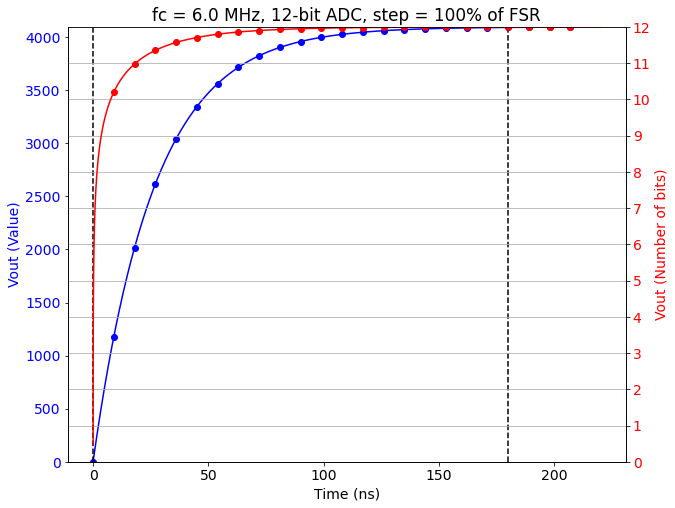

In [1483]:
## Plotting Vout
fig=plt.figure(figsize=(10,8))

ax1=fig.add_subplot(1,1,1)

color="blue"
ax1.plot(t_vect*1e9, Vout, color=color, label="Vout (fc={0:2.0f}MHz)".format(fc/1e6))
ax1.plot(t_samp*1e9, Vout_samp, 'o',color=color, label="Vout (fc={0:2.0f}MHz)".format(fc/1e6))
ax1.plot([0,0], [0,2**nbits], '--k')
ax1.plot([Trow*1e9,Trow*1e9], [0,2**nbits], '--k')
ax1.set_xlabel('Time (ns)')
ax1.set_ylabel('Vout (Value)', color=color)
ax1.set_ylim(0,2**nbits)
ax1.set_title("fc = {0:1.1f} MHz, {1:2d}-bit ADC, step = {2:2d}% of FSR".format(fc/1e6, nbits, range_percent))
ax1.tick_params(axis='y', labelcolor=color)

color="red"
ax3=ax1.twinx()
ax3.plot(t_vect[Vout>0]*1e9, np.log(Vout[Vout>0])/np.log(2), color=color, label="Vout (fc={0:2.0f}MHz)".format(fc/1e6))
ax3.plot(t_samp[Vout_samp>0]*1e9, np.log(Vout_samp[Vout_samp>0])/np.log(2), 'o', color=color, label="Vout (fc={0:2.0f}MHz)".format(fc/1e6))
ax3.set_ylim(0,nbits)
ax3.set_ylabel('Vout (Number of bits)', color=color)
ax3.tick_params(axis='y', labelcolor=color)
major_ticks=np.arange(nbits+1)
ax3.set_yticks(major_ticks)
ax3.grid()

#fig.tight_layout()
#plt.savefig('DRE-power-dissipation.jpg', dpi=200, bbox_inches='tight')

#print("We are at 5% of the target value after 3/w0 = {0:3.0f} ns".format(3e9/w0))
#print("The LSB of a {0:1d}-bit ADC weights {1:6.3f} % of the FSR".format(nbits, 100/2**nbits))

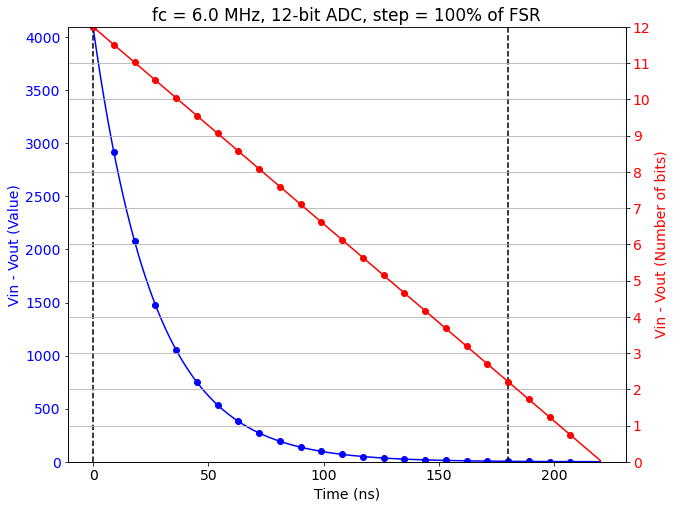

In [1484]:
## Plotting the error Vout-Vin
error = Vin*np.ones(len(Vout))-Vout
error_samp = Vin*np.ones(len(Vout_samp))-Vout_samp

fig=plt.figure(figsize=(10,8))

ax1=fig.add_subplot(1,1,1)

color="blue"
ax1.plot(t_vect*1e9, error, color=color, label="Remaining error (fc={0:2.0f}MHz)".format(fc/1e6))
ax1.plot(t_samp*1e9, error_samp, 'o', color=color, label="Remaining error (fc={0:2.0f}MHz)".format(fc/1e6))
ax1.plot([0,0], [0,2**nbits], '--k')
ax1.plot([Trow*1e9,Trow*1e9], [0,2**nbits], '--k')
ax1.set_xlabel('Time (ns)')
ax1.set_ylabel('Vin - Vout (Value)', color=color)
ax1.set_ylim(0,2**nbits)
ax1.set_title("fc = {0:1.1f} MHz, {1:2d}-bit ADC, step = {2:2d}% of FSR".format(fc/1e6, nbits, range_percent))
ax1.tick_params(axis='y', labelcolor=color)

color="red"
ax3=ax1.twinx()
ax3.plot(t_vect*1e9, np.log(error)/np.log(2), color=color, label="Remaining error (fc={0:2.0f}MHz)".format(fc/1e6))
ax3.plot(t_samp*1e9, np.log(error_samp)/np.log(2), 'o', color=color, label="Remaining error (fc={0:2.0f}MHz)".format(fc/1e6))
ax3.set_ylim(0,nbits)
ax3.set_ylabel('Vin - Vout (Number of bits)', color=color)
ax3.tick_params(axis='y', labelcolor=color)
major_ticks=np.arange(nbits+1)
ax3.set_yticks(major_ticks)
ax3.grid()

#fig.tight_layout()
#plt.savefig('DRE-power-dissipation.jpg', dpi=200, bbox_inches='tight')
